<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Interpolation_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Interpolation of Datasets
================================================

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

**Simple Example of Cubic Lagrange Interpolation of a dataset**
* From file [lagrange_interp_ex.py](02-Interpolation/lagrange_interp_ex.py)

#### The Problem:

The upward velocity of a rocket is given as a function of time in the arrays named 'v_t' and 't' in the code below. Estimate the velocity of the rocket at $t=16$ seconds using the Lagrange method of cubic interpolation. Also, estimate the distance travelled by the rocket from $t=11$ to $t=16$ seconds. Display an expression for the interpolant used for this purpose.

In [ ]:
import numpy as np
from scipy.interpolate import lagrange

t_eval = 16.0
t = np.array([0, 10, 15, 20, 22.5, 30])
v_t = np.array([0, 227.04, 362.78, 517.35, 602.97, 901.67])

interpolant = lagrange(t[1:5], v_t[1:5])
interp_val = np.polyval(interpolant, t_eval)

t0, t1 = 11, 16
s = np.polyint(interpolant)

print('The distance travelled in the time interval', t0, '-' , t1, '=', 
	np.polyval(s, t1)-np.polyval(s, t0))
print('The value of the interpolant of order', interpolant.order, 'at t =',
      t_eval, 'is', interp_val)
print("Interpolant:")
print(interpolant)

The distance travelled in the time interval 11 - 16 = 1604.9997066666629
The value of the interpolant of order 3 at t = 16.0 is 392.05716799999936
Interpolant:
          3         2
0.005435 x + 0.132 x + 21.27 x - 4.254


**Simple Example of Piecewise Quadratic Interpolation of a dataset**
* From file [piecewise_interp_ex.py](02-Interpolation/piecewise_interp_ex.py)

#### The Problem:

Obtain and plot a piecewise quadratic interpolant of data sampled from the sine function in the interval $[0, 2\pi]$ and compare with exact values.

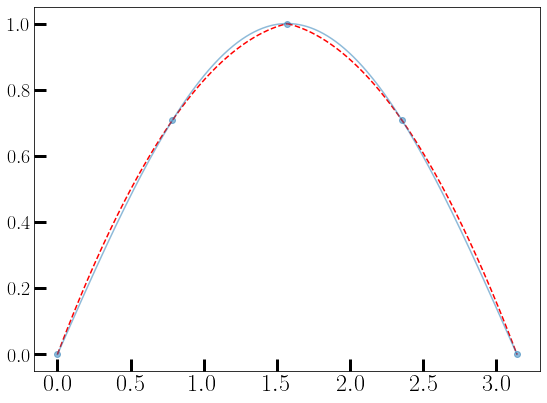

In [ ]:
import numpy as np
from scipy.interpolate import lagrange

t = np.linspace(0, np.pi, 5)
v_t = np.sin(t)

size = 3
step = 2

t_pieces = [t[i:i + size] for i in range(0, len(t), step)]
vt_pieces = [v_t[i:i + size] for i in range(0, len(v_t), step)]

for n, tpiece in enumerate(t_pieces):
    interpolant = lagrange(tpiece, vt_pieces[n])
    t_cont = np.linspace(tpiece[0], tpiece[-1], 1000)
    interp_vals = np.polyval(interpolant, t_cont)
    plt.plot(t_cont, interp_vals, 'r--')

full_interpolant = lagrange(t, v_t)
interp_vals = np.polyval(full_interpolant, t)
plt.scatter(t, interp_vals, alpha=0.5)

t_cont = np.linspace(0, np.pi, 1000)
plt.plot(t_cont, np.sin(t_cont), alpha=0.5)

plt.show()

**The Runge Effect: Demonstrated with the standard Runge Function**
* From file [runge_interp.py](02-Interpolation/runge_interp.py)


#### The Problem:
Consider the Runge Function, defined by 
\begin{equation*}
f(x)\equiv \frac{1}{1+25x^2}
\end{equation*}

If we sample the function at $N+1$ equidistant points in the interval $[-1,1]$, and take those points as our 'data', then we can use the Lagrange method to interpolate an $N^{th}$ order polynomial that passes through all of them. As can be readily seen in the output of the code below, this is a very bad idea for large values of $N$, since the interpolant becomes a poor representation of the exact function due to rapid oscillations at the edges of the interval.

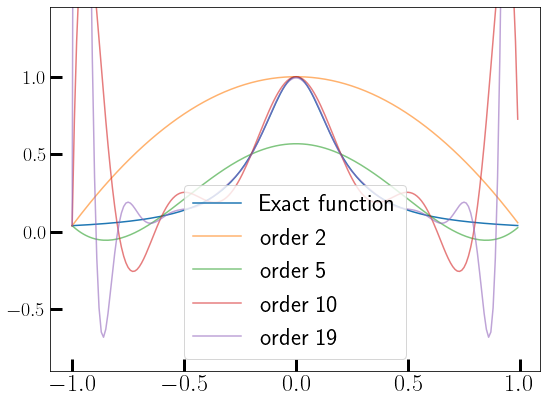

In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def runge(x):
    return 1/(1 + 25 * x**2)

x = np.arange(-1., 1., 0.01)
plt.plot(x, runge(x), label = 'Exact function')

orders = [2,5,10,19]

for order in orders:
    xvals = np.linspace(-1.0, 1.0, order + 1)
    interpolant = lagrange(xvals, runge(xvals))
    plt.plot(x, np.polyval(interpolant, x), label="order %d" % (order), alpha=0.6)    

plt.ylim(-0.9,1.45)
plt.legend()
plt.show()

**Cubic Spline Interpolation of the Runge function**
* From file [runge_spline.py](02-Interpolation/runge_spline.py)

#### The Problem:
Consider again the Runge Function, defined by 
\begin{equation*}
f(x)\equiv \frac{1}{1+25x^2}
\end{equation*}

If we sample the function at $9$ equidistant points in the interval $[-1,1]$, and take those points as our 'data'. Now, instead of a lagrange interpolant, plot a cubic spline interpolant that passes through all these data points. Compare this with a lagrange interpolant of order $8$.

As can be seen from the results below, the spline is a much better representation of the dataset than the lagrange interpolant. Unlike the piecewise interpolant, this spline is both continuous and differentiable in the entire interval.

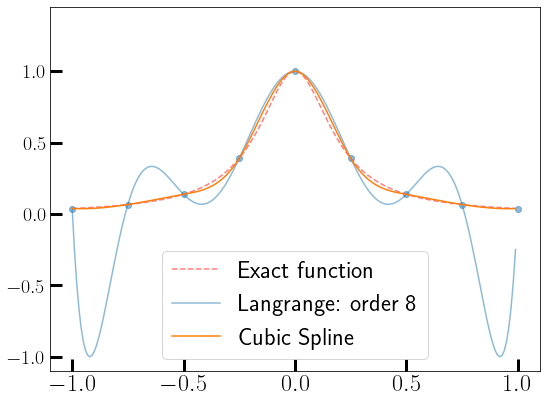

In [ ]:
import numpy as np
from scipy.interpolate import lagrange, interp1d
import matplotlib.pyplot as plt

def runge(x):
    return 1/(1 + 25 * x**2)

x = np.arange(-1., 1., 0.01)
plt.plot(x, runge(x), 'r--', label='Exact function', alpha=0.5)

npoints = 8

xvals = np.linspace(-1.0, 1.0, npoints + 1)
interpolant = lagrange(xvals, runge(xvals))
plt.plot(x, np.polyval(interpolant, x), label="Langrange: order %d"
         % (npoints), alpha=0.5)
plt.scatter(xvals, np.polyval(interpolant, xvals), alpha=0.5)

spline = interp1d(xvals, runge(xvals), kind='cubic')
plt.plot(x, spline(x), label="Cubic Spline")

plt.ylim(-1.1, 1.45)
plt.legend()
plt.show()